# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [3]:
cities

['port lincoln',
 'kapoeta',
 'sabang',
 'mataura',
 'strezhevoy',
 'san patricio',
 'chokurdakh',
 'xadani',
 'qaanaaq',
 'lebu',
 'albany',
 'bosilegrad',
 'new norfolk',
 'namibe',
 'yellowknife',
 'kodiak',
 'ushuaia',
 'bambous virieux',
 'mar del plata',
 'vaini',
 'busselton',
 'santiago del estero',
 'harihar',
 'jizan',
 'cape town',
 'iqaluit',
 'newport',
 'tuktoyaktuk',
 'puerto ayora',
 'ilulissat',
 'ponta do sol',
 'florianopolis',
 'hobart',
 'illoqqortoormiut',
 'komsomolskiy',
 'kyzyl-suu',
 'palmerston',
 'saleaula',
 'miyako',
 'letterkenny',
 'pevek',
 'bredasdorp',
 'khatanga',
 'san ramon',
 'hasaki',
 'kapaa',
 'hermanus',
 'port alfred',
 'atuona',
 'umm durman',
 'palanga',
 'abuyog',
 'punta arenas',
 'yar-sale',
 'spring hill',
 'tsabong',
 'wewak',
 'srednekolymsk',
 'sarana',
 'santa fe',
 'carnarvon',
 'vila velha',
 'avarua',
 'vaitupu',
 'husavik',
 'isangel',
 'codrington',
 'rocha',
 'taolanaro',
 'souillac',
 'oranjemund',
 'torbay',
 'dikson',
 'sao

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty lists to hold data

lat = []
lon = []
max_temp = []
humidity = []
wind_speed = []
cloudiness = []
country = []
date = []
name = []
index_number = 0
set_number = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"

    # partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    try:
        print(f"Processing Record {index_number} of Set {set_number} | {city}")
        
        response = requests.get(query_url + city).json()
        
        #add weather data for city into lists
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        
        if index_number == 49:
            #reset record number to 0
            city_number = 0
            #increase set number by 1
            index_number += 1
        else:
            #increase record number by 1            
            index_number += 1
            
    except:
        print(f"City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | port lincoln
Processing Record 1 of Set 1 | kapoeta
Processing Record 2 of Set 1 | sabang
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | strezhevoy
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | xadani
City not found. Skipping...
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | bosilegrad
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | santiago del estero
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dataframe from data in lists
weather_api_dict = {
                    "lat": lat,
                    "lon": lon,
                    "max_temp": max_temp,
                    "humidity": humidity,
                    "wind_speed": wind_speed,
                    "cloudiness": cloudiness,
                    "country": country,
                    "date": date,
                    "name": name,
                    }
weather_api_df = pd.DataFrame(weather_api_dict)
weather_api_df

,lat,lon,max_temp,humidity,wind_speed,cloudiness,country,date,name
0,-34.7333,135.8667,62.87,54,15.37,100,AU,1665364935,Port Lincoln
1,4.7717,33.5903,73.13,72,2.93,100,SS,1665364935,Kapoeta
2,5.8933,95.3214,80.69,77,10.58,100,ID,1665364936,Sabang
3,-46.1927,168.8643,58.23,60,5.37,100,NZ,1665364936,Mataura
4,60.7333,77.5889,36.73,93,7.11,100,RU,1665364936,Strezhevoy
...,...,...,...,...,...,...,...,...,...
526,19.9103,109.6859,72.43,79,14.27,90,CN,1665365104,Lingao
527,21.6422,69.6093,81.79,80,4.85,35,IN,1665365105,Porbandar
528,2.0167,112.9333,76.64,90,1.21,100,MY,1665365105,Kapit
529,50.0979,118.0369,37.26,38,5.28,13,RU,1665365106,Krasnokamensk


In [6]:
weather_api_df.count()

lat           531
lon           531
max_temp      531
humidity      531
wind_speed    531
cloudiness    531
country       531
date          531
name          531
dtype: int64

In [9]:
# save df as csv
weather_api_df.to_csv("output_data/cities.csv")

In [10]:
weather_api_df

,lat,lon,max_temp,humidity,wind_speed,cloudiness,country,date,name
0,-34.7333,135.8667,62.87,54,15.37,100,AU,1665364935,Port Lincoln
1,4.7717,33.5903,73.13,72,2.93,100,SS,1665364935,Kapoeta
2,5.8933,95.3214,80.69,77,10.58,100,ID,1665364936,Sabang
3,-46.1927,168.8643,58.23,60,5.37,100,NZ,1665364936,Mataura
4,60.7333,77.5889,36.73,93,7.11,100,RU,1665364936,Strezhevoy
...,...,...,...,...,...,...,...,...,...
526,19.9103,109.6859,72.43,79,14.27,90,CN,1665365104,Lingao
527,21.6422,69.6093,81.79,80,4.85,35,IN,1665365105,Porbandar
528,2.0167,112.9333,76.64,90,1.21,100,MY,1665365105,Kapit
529,50.0979,118.0369,37.26,38,5.28,13,RU,1665365106,Krasnokamensk


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_api_df['humidity'].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

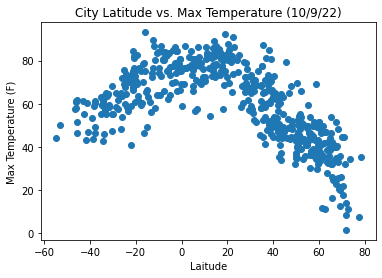

In [12]:
# Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_api_df["lat"], weather_api_df["max_temp"])

plt.title("City Latitude vs. Max Temperature (10/9/22)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")

# Save the plotted figure as .pngs
plt.savefig("output_data/Latitude vs. Temperature Plot.png")

plt.show()

## Latitude vs. Humidity Plot

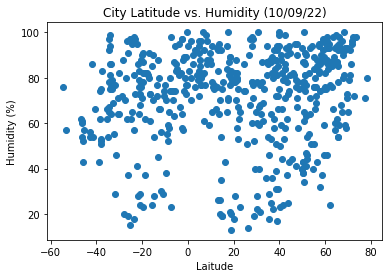

In [13]:
# Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_api_df["lat"], weather_api_df["humidity"])

plt.title("City Latitude vs. Humidity (10/09/22)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

# Save the plotted figure as .pngs
plt.savefig("output_data/Latitude vs. Humidity Plot.png")

## Latitude vs. Cloudiness Plot

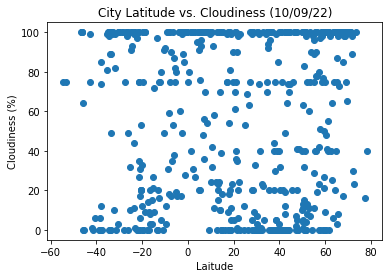

In [14]:
# Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_api_df["lat"], weather_api_df["cloudiness"])

plt.title("City Latitude vs. Cloudiness (10/09/22)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")

# Save the plotted figure as .pngs
plt.savefig("output_data/Latitude vs. Cloudiness Plot.png")

In [15]:
print(weather_api_df['cloudiness'].min())
print(weather_api_df['cloudiness'].max())

0
100


## Latitude vs. Wind Speed Plot

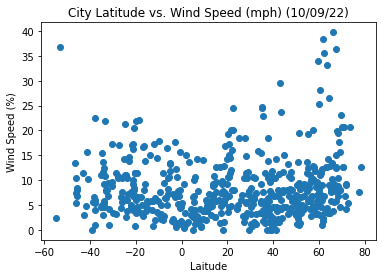

In [16]:
# Latitude vs. Wind Speed scatter plot
plt.scatter(weather_api_df["lat"], weather_api_df["wind_speed"])

plt.title("City Latitude vs. Wind Speed (mph) (10/09/22)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")

# Save the plotted figure as .pngs
plt.savefig("output_data/Latitude vs. Wind Speed Plot.png")

## Linear Regression

In [17]:
# Separate Northern and Southern Hemispheres in dataframes

n_df = weather_api_df.loc[weather_api_df["lat"] >= 0]
s_df = weather_api_df.loc[weather_api_df["lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7244235367932051


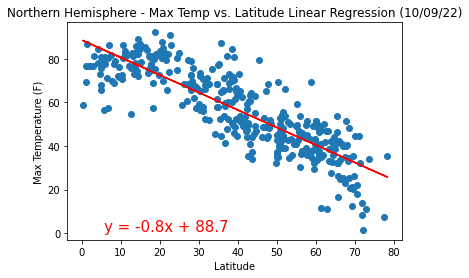

<Figure size 432x288 with 0 Axes>

In [18]:
# Print out the r-squared value along with the plot.
x_values = n_df['lat']
y_values = n_df['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (10/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

<span style="color: red;">This graph is displaying a relationship between temperature and latitude location. As the latitude coordinates grow then max tempurature of the city decrease.</span>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4733288595415373


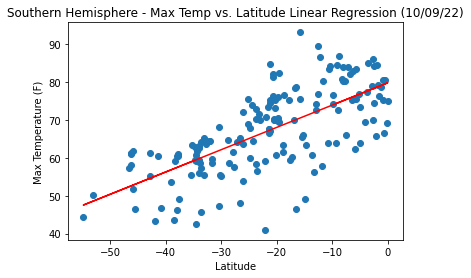

<Figure size 432x288 with 0 Axes>

In [19]:
# Print out the r-squared value along with the plot.
x_values = s_df['lat']
y_values = s_df['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (10/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

<span style="color: red;">This graph is displaying a relationship between temperature and latitude location. As the latitude coordinates grow then max tempurature of the city increase.</span>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009982163287435869


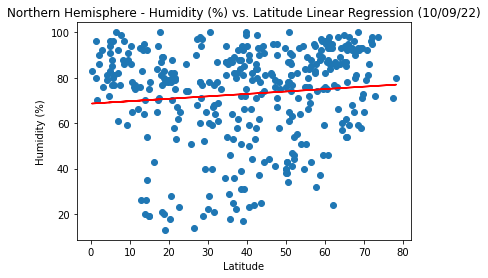

<Figure size 432x288 with 0 Axes>

In [20]:
# Print out the r-squared value along with the plot.
x_values = n_df['lat']
y_values = n_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (10/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

<span style="color: red;">This graph is displaying that there is no relationship between humidity and latitude location.</span>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.028614606762539855


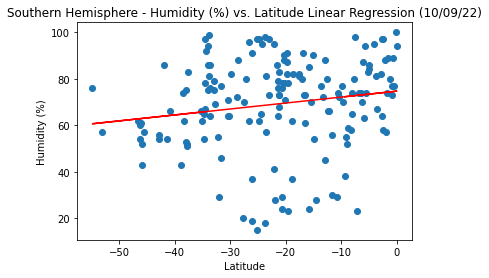

<Figure size 432x288 with 0 Axes>

In [21]:
# Print out the r-squared value along with the plot.
x_values = s_df['lat']
y_values = s_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (10/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

<span style="color: red;">This graph is displaying that there is no relationship between humidity and latitude location.</span>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011725446691482707


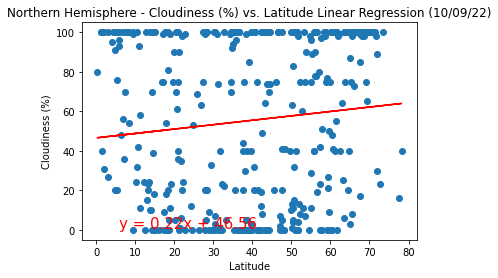

<Figure size 432x288 with 0 Axes>

In [22]:
# Print out the r-squared value along with the plot.
x_values = n_df['lat']
y_values = n_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (10/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

<span style="color: red;">This graph is displaying that there is no relationship between cloudiness and latitude location.</span>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0013603337134738683


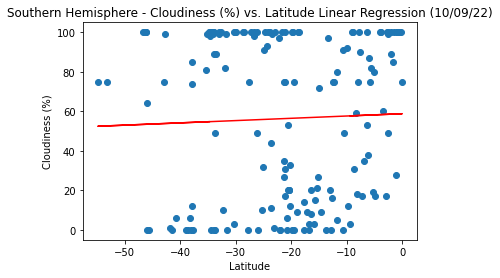

<Figure size 432x288 with 0 Axes>

In [23]:
# Print out the r-squared value along with the plot.
x_values = s_df['lat']
y_values = s_df['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (10/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

<span style="color: red;">This graph is displaying that there is no relationship between cloudiness and latitude location.</span>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.061803183432559285


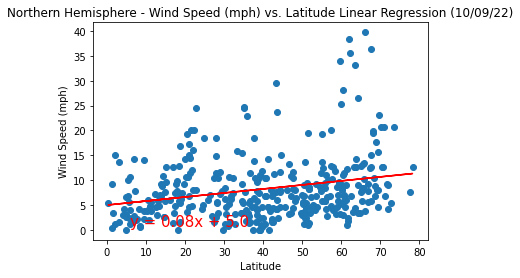

<Figure size 432x288 with 0 Axes>

In [24]:
# Print out the r-squared value along with the plot.
x_values = n_df['lat']
y_values = n_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (10/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

<span style="color: red;">This graph is displaying that there is no relationship between windspeed and latitude location.</span>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.018695687616602244


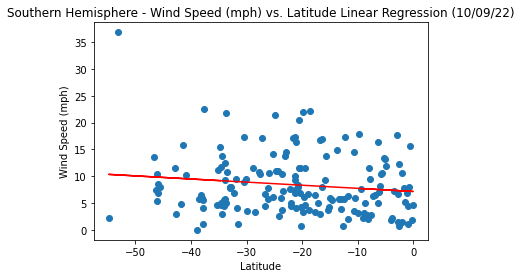

<Figure size 432x288 with 0 Axes>

In [25]:
# Print out the r-squared value along with the plot.
x_values = s_df['lat']
y_values = s_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (10/09/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Save the plotted figure as .pngs
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

<span style="color: red;">This graph is displaying that there is no relationship between windspeed and latitude location.</span>